In [5]:
from io import open
import glob
import os

def findFiles(path):
    return glob.glob(path)

print(findFiles('data/data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn' and c in all_letters
    )
    
print(unicodeToAscii('Ślusàrski'))

category_lines = {}
all_categories = []

def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines
    
n_categories = len(all_categories)

['data/data/names\\Arabic.txt', 'data/data/names\\Chinese.txt', 'data/data/names\\Czech.txt', 'data/data/names\\Dutch.txt', 'data/data/names\\English.txt', 'data/data/names\\French.txt', 'data/data/names\\German.txt', 'data/data/names\\Greek.txt', 'data/data/names\\Irish.txt', 'data/data/names\\Italian.txt', 'data/data/names\\Japanese.txt', 'data/data/names\\Korean.txt', 'data/data/names\\Polish.txt', 'data/data/names\\Portuguese.txt', 'data/data/names\\Russian.txt', 'data/data/names\\Scottish.txt', 'data/data/names\\Spanish.txt', 'data/data/names\\Vietnamese.txt']
Slusarski


In [6]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [7]:
print(category_lines['Chinese'][:5])

['Ang', 'AuYong', 'Bai', 'Ban', 'Bao']


In [8]:
print(category_lines['Korean'][:5])

['Ahn', 'Baik', 'Bang', 'Byon', 'Cha']


In [10]:
import torch

def letterToIndex(letter):
    return all_letters.find(letter)

def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [11]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)



In [12]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output, next_hidden)

tensor([[-2.8331, -2.8612, -2.8866, -2.8961, -3.0046, -2.9175, -2.9161, -2.8077,
         -2.8914, -2.9207, -2.8988, -2.9143, -2.8499, -2.8893, -2.8326, -2.9491,
         -2.8125, -2.9690]], grad_fn=<LogSoftmaxBackward0>) tensor([[-0.0279, -0.0361, -0.0822,  0.0952,  0.0726,  0.0291,  0.0097, -0.0488,
          0.0125, -0.0333,  0.0035,  0.0156,  0.0152,  0.0641, -0.0458,  0.1011,
         -0.0260,  0.0516,  0.0492,  0.0276, -0.0274,  0.0479, -0.0381, -0.1285,
          0.0760,  0.0118,  0.0532,  0.0898, -0.0099,  0.0039, -0.0253, -0.0176,
         -0.0607, -0.0238,  0.0192,  0.0032,  0.1020, -0.0267, -0.0095,  0.0292,
          0.0956, -0.0416, -0.0242,  0.0624, -0.0541, -0.0934,  0.0908, -0.0665,
          0.0350, -0.0349,  0.1186, -0.0491,  0.0029,  0.0291,  0.0769,  0.0876,
         -0.0638,  0.0134, -0.0475,  0.0052,  0.0426, -0.0818, -0.0696, -0.0034,
          0.0445, -0.0457, -0.1102, -0.0968, -0.0454,  0.0979, -0.0801, -0.0385,
         -0.1101,  0.0073,  0.0106,  0.0862, -0.0

In [13]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output)

tensor([[-2.8331, -2.8612, -2.8866, -2.8961, -3.0046, -2.9175, -2.9161, -2.8077,
         -2.8914, -2.9207, -2.8988, -2.9143, -2.8499, -2.8893, -2.8326, -2.9491,
         -2.8125, -2.9690]], grad_fn=<LogSoftmaxBackward0>)


In [15]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.8331, -2.8612, -2.8866, -2.8961, -3.0046, -2.9175, -2.9161, -2.8077,
         -2.8914, -2.9207, -2.8988, -2.9143, -2.8499, -2.8893, -2.8326, -2.9491,
         -2.8125, -2.9690]], grad_fn=<LogSoftmaxBackward0>)


In [17]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Greek', 7)


In [23]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l)-1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category: {} \t line: {}'.format(category,line))

category: German 	 line: Wagner
category: French 	 line: Berger
category: Chinese 	 line: Tso
category: Polish 	 line: Gorka
category: English 	 line: Dean
category: German 	 line: Zellweger
category: Dutch 	 line: Adrichem
category: Russian 	 line: Ruzin
category: Korean 	 line: Yi
category: Scottish 	 line: Mcgregor


In [24]:
criterion = nn.NLLLoss()

In [25]:
learning_rate = 0.005

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    
    rnn.zero_grad()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    loss = criterion(output, category_tensor)
    loss.backward()
    
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)
        
    return output, loss.item()

In [27]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss = 0
all_losses=[]

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return'%dm %ds' % (m,s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss
    
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = 'O' if guess == category else 'X (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter/n_iters * 100, timeSince(start), loss, line, guess, correct))
        
    if iter % plot_every == 0:
        all_losses.append(current_loss/plot_every)
        current_loss = 0 
        

5000 5% (0m 6s) 2.8591 Hino / Vietnamese X (Japanese)
10000 10% (0m 12s) 3.0592 Naysmith / Japanese X (English)
15000 15% (0m 19s) 2.4455 Altena / Spanish X (Dutch)
20000 20% (0m 25s) 1.4702 Piatek / Czech X (Polish)
25000 25% (0m 32s) 3.1781 Santos / Greek X (Spanish)
30000 30% (0m 39s) 0.7762 So / Korean O
35000 35% (0m 45s) 2.8656 Jacks / Polish X (English)
40000 40% (0m 52s) 0.7912 Shammas / Arabic O
45000 45% (0m 59s) 1.7602 Maier / Arabic X (German)
50000 50% (1m 5s) 1.0912 Lang / Vietnamese X (Chinese)
55000 55% (1m 12s) 1.3449 Shi / Korean X (Chinese)
60000 60% (1m 18s) 0.2658 Kasprzak / Polish O
65000 65% (1m 25s) 0.2726 Kaczka / Polish O
70000 70% (1m 32s) 1.1147 Ustohal / Czech O
75000 75% (1m 39s) 0.5992 Nosek / Polish O
80000 80% (1m 45s) 0.7423 O'Sullivan / Irish O
85000 85% (1m 52s) 0.9969 Watnabe / Japanese O
90000 90% (1m 59s) 0.1313 Vuu / Vietnamese O
95000 95% (2m 5s) 0.1883 Sokolsky / Polish O
100000 100% (2m 12s) 0.8467 Oursler / German O


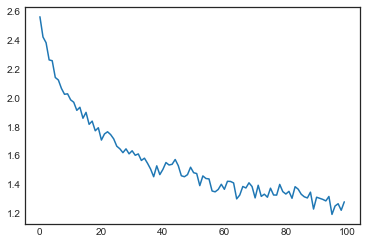

In [28]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.plot(all_losses)
plt.show()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_13424/3149747792.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+all_categories, rotation=90)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_13424/3149747792.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+all_categories)


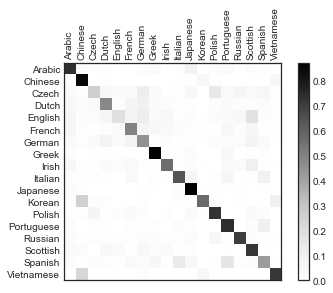

In [29]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 100000

def evaluate(line_tensor):
    hidden = rnn.initHidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    return output

for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] +=1
    
for i in range(n_categories):
    confusion[i] = confusion[i]/confusion[i].sum()
    
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)
ax.set_xticklabels(['']+all_categories, rotation=90)
ax.set_yticklabels(['']+all_categories)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [34]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))
        
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []
        
        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])
            
predict('Jackson')
predict('Bill')
predict('Dovesky')
predict('Swan')


> Jackson
(-0.16) Scottish
(-2.67) English
(-3.34) Russian

> Bill
(-1.78) German
(-1.81) Scottish
(-1.87) English

> Dovesky
(-0.39) Russian
(-1.64) Czech
(-2.89) Polish

> Swan
(-0.70) Korean
(-1.07) Chinese
(-3.23) Scottish
